In [1]:
import re
from urllib import request

ipPatt = re.compile(r"\d+\.\d+\.\d+\.\d+")
ips = {}

#Collect necessary data (hacking starting hours by ip) from oct2019.txt
with open("oct2019.txt") as infile:
    for line in infile:
        parts = line.split()
        ip = parts[2]
        startingHour = int(parts[6].split(':')[0])
        if ipPatt.fullmatch(ip):
            if ip in ips:
                ips[ip].append(startingHour)
            else:
                ips[ip] = [startingHour] 
                     

In [4]:
import json
import time

distinctIps = list(ips.keys())
countries = []
url = "http://ip-api.com/batch"

# Collect country information by ip.
for i in range(0, len(distinctIps), 100):
    pars = [{"query": ip, "fields": "country"} for ip in distinctIps[i:i+100]]
    data = json.dumps(pars)
    data = data.encode('ascii')
    with request.urlopen(url, data) as req:
        countries += [elem['country'] for elem in json.loads(req.read())]
        
    time.sleep(5)

In [44]:
import heapq
from operator import itemgetter

# Dictionary which holds needed data (country : hacking attemps) for first part of the task.
part1Data = {}
# Calculate hacking attemps by country
for i in range(0, len(countries)):
    if countries[i] in part1Data:
        part1Data[countries[i]] += len(ips[distinctIps[i]])
    else:
        part1Data[countries[i]] = len(ips[distinctIps[i]])

# Get top 10 hacker countries
top10 = heapq.nlargest(10, part1Data.items(), key=itemgetter(1))


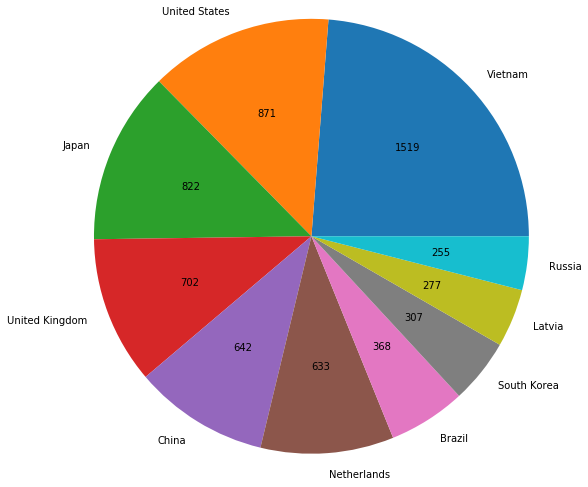

In [26]:
import matplotlib.pyplot as plt

# Function which calculates hacking attemps by country
# (Check plt.pie(), autopct)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return str(val)
    return my_autopct

# Get names & attemps from to10 hacker countries
labels = [t[0] for t in top10]
values = [t[1] for t in top10]

# Make pie chart & save it
plt.pie(values, labels=labels, autopct=make_autopct(values), radius=2.5)
plt.savefig('hackpie.png', bbox_inches='tight')

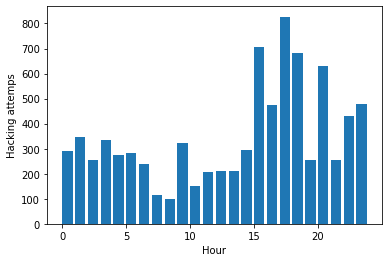

In [45]:
# Second task functionality

#get all starting hours
allHours = []
for hl in ips.values():
    allHours += hl

# x & y axis data
x = list(range(0,24))
y = []
for i in range(0,24):
    y.append(len([hour for hour in allHours if hour >= i and hour < i+1]))

# Make bar chart & save it
plt.bar(x, y, align='edge')
plt.xlabel('Hour')
plt.ylabel('Hacking attemps')
plt.savefig('hackbar.png')